### Dependencies

In [2]:
### Dependencies
# Base Dependencies
import os
import pickle
import sys

# LinAlg / Stats / Plotting Dependencies
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import umap
import umap.plot
from tqdm import tqdm

# Torch Dependencies
import torch
import torch.multiprocessing
import torchvision
import torch.utils.data.dataset as Dataset
from torchvision import transforms
from pl_bolts.models.self_supervised import resnets
from pl_bolts.utils.semi_supervised import Identity
device = torch.device('cuda:0')
torch.multiprocessing.set_sharing_strategy('file_system')

# Model Architectures
from nn_encoder_arch.vision_transformer import vit_small
from nn_encoder_arch.resnet_trunc import resnet50_trunc_baseline

# Utils
from patch_extraction_utils import eval_transforms, torchvision_ssl_encoder
from patch_extraction_utils import CSVDataset_BreastPathQ, CSVDataset_BCSS
from patch_extraction_utils import create_embeddings, save_embeddings, create_UMAP

### How To Use
1. Download CRC-100K, BCSS, and BreastPathQ and place in a directory for holding patch datasets
2. Download pretrain models in the "./ckpts/" via Git-LFS
3. Run the "create_embeddings" function to save extract features for each patch dataset
4. Pre-extracted features for each patch dataset are available in "embeddings_patch_library" via Git-LFS

### Embedding Library Construction

In [5]:
### Extracting Patch Features
patch_datasets = 'patch/to/PatchDatasets/'
library_path = './embeddings_patch_library/'
os.makedirs(library_path, exist_ok=True)
models = ['resnet50_trunc', 'resnet50_tcga_brca_simclr', 'vits_tcga_brca_dino']

for enc_name in models:
    create_embeddings(patch_datasets=patch_datasets, embeddings_dir=library_path, enc_name=enc_name, dataset='crc100knonorm')
    create_embeddings(patch_datasets=patch_datasets, embeddings_dir=library_path, enc_name=enc_name, dataset='crc100k')
    create_embeddings(patch_datasets=patch_datasets, embeddings_dir=library_path, enc_name=enc_name, dataset='bcss')
    create_embeddings(patch_datasets=patch_datasets, embeddings_dir=library_path, enc_name=enc_name, dataset='breastpathq')

Extracting Features for 'crc100knonorm' via 'resnet50_trunc'
Extracting Features for 'crc100k' via 'resnet50_trunc'
Extracting Features for 'bcss' via 'resnet50_trunc'
Extracting Features for 'breastpathq' via 'resnet50_trunc'
Extracting Features for 'crc100knonorm' via 'resnet50_tcga_brca_simclr'
Extracting Features for 'crc100k' via 'resnet50_tcga_brca_simclr'
Extracting Features for 'bcss' via 'resnet50_tcga_brca_simclr'
Extracting Features for 'breastpathq' via 'resnet50_tcga_brca_simclr'
Extracting Features for 'crc100knonorm' via 'vits_tcga_brca_dino'
Extracting Features for 'crc100k' via 'vits_tcga_brca_dino'
Extracting Features for 'bcss' via 'vits_tcga_brca_dino'
Extracting Features for 'breastpathq' via 'vits_tcga_brca_dino'


### UMAP Visualization

<Figure size 1000x1000 with 0 Axes>

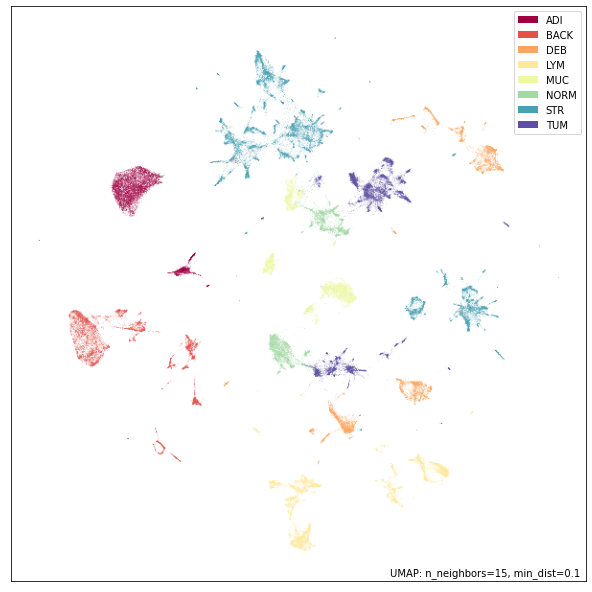

<Figure size 1000x1000 with 0 Axes>

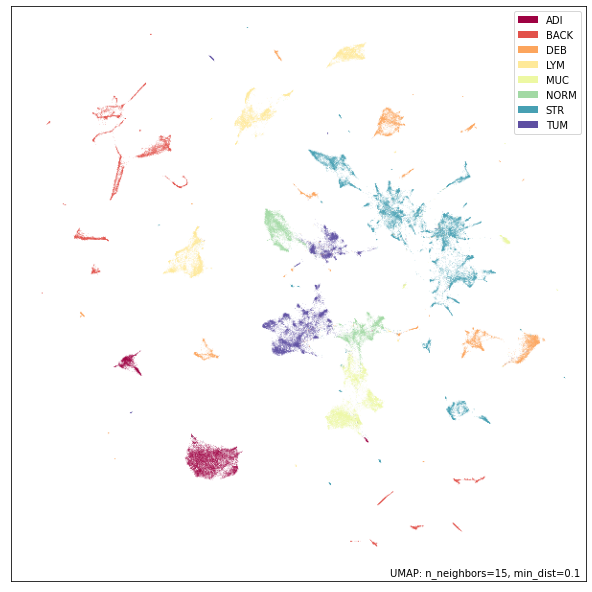

<Figure size 1000x1000 with 0 Axes>

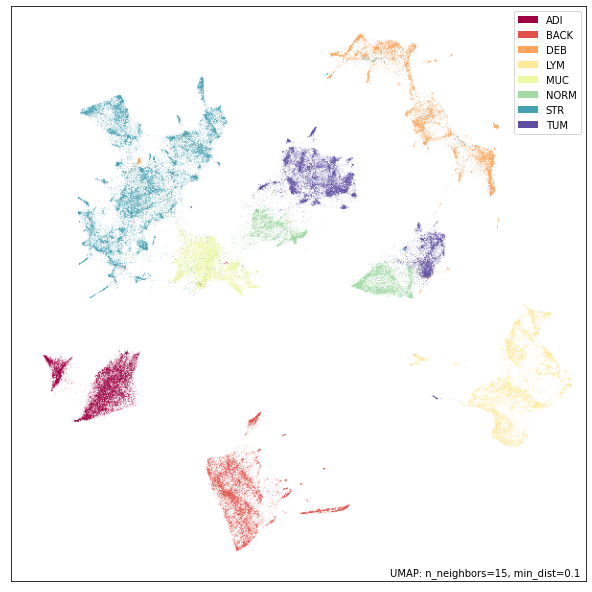

<Figure size 1000x1000 with 0 Axes>

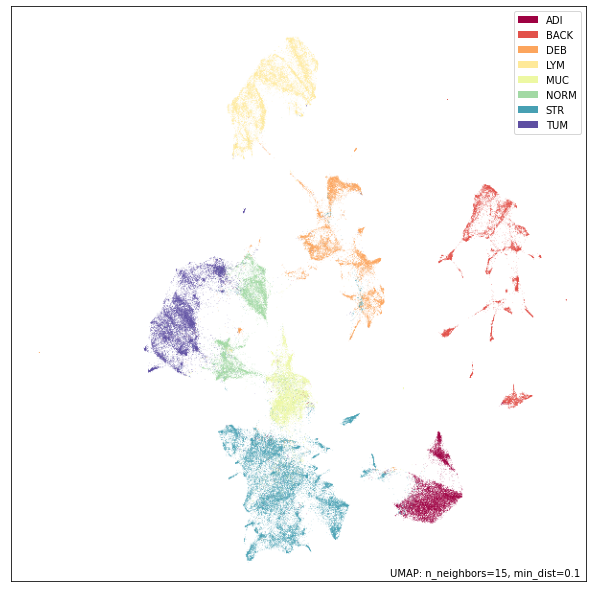

<Figure size 1000x1000 with 0 Axes>

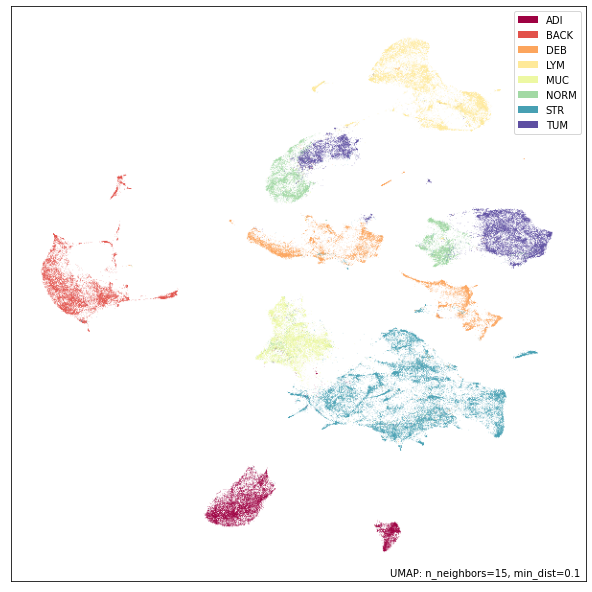

<Figure size 1000x1000 with 0 Axes>

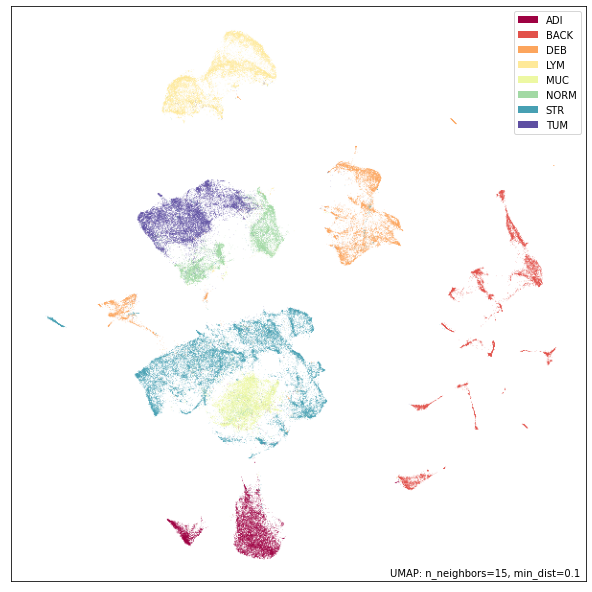

In [4]:
library_path = './embeddings_patch_library/'
umap_save_path = './UMAPs/'
os.makedirs(umap_save_path, exist_ok=True)
models = ['resnet50_trunc', 'resnet50_tcga_brca_simclr', 'vits_tcga_brca_dino']

for enc_name in models:
    create_UMAP(library_path=library_path, save_path=umap_save_path, dataset='crc100knonorm_train', enc_name=enc_name)
    create_UMAP(library_path=library_path, save_path=umap_save_path, dataset='crc100k_train', enc_name=enc_name)